In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv("C:/Users/ashar.burney/Downloads/hospitaldata.csv")
#Q1Please remove the dots in the names, so it may become easier for you to work through it. 
     
df.columns=df.columns.str.replace("[.]","")
print(df.head())

                       Date   id     Time Age Sex  ConsultingDoctor  \
0  Sunday, January 01, 2017  101    11:00  40   F     Dr Kinza Alam   
1  Monday, January 02, 2017  150  10:45AM  26   M     Nursing Staff   
2  Monday, January 02, 2017   58  12:38PM  30   F  Dr Riffat Naheed   
3  Monday, January 02, 2017   75   1:00PM  40   M  Dr Riffat Naheed   
4  Monday, January 02, 2017   97   2:45PM  27   M  Dr Riffat Naheed   

         Specialty     Procedure TotalCharges  AmountReceived AmountBalance  \
0            Gynae     C Section        30000         30000.0          -      
1              NaN      Dressing         1500          1500.0          -      
2  Psychotherapist  Consultation         1000          1000.0          -      
3  Psychotherapist  Consultation         1500          1500.0          -      
4  Psychotherapist  Consultation         2000          2000.0          -      

  AmountReceivedBy  AmountinHospital ReceptionistName NextApt  
0      Mrs Shamsa                N

In [3]:
#Q2Which day of the week is expected to have most visits? 
df.Date=pd.to_datetime(df.Date)
most_day=df.Date.dt.weekday_name.value_counts()
print(most_day)

Monday       51
Wednesday    43
Tuesday      42
Thursday     33
Friday       26
Saturday     20
Sunday        7
Name: Date, dtype: int64


In [4]:
#Q3What is the average age of patients?
df.Age=pd.to_numeric(df.Age,errors='coerce')
df.Age=df.Age.fillna(0)
print(round(df.Age.mean(),0))

28.0


In [5]:
#Q4How many children were entertained?
child_count=0
for i in range(0,len(df.Age)):
    if df.Age[i]>=1 and df.Age[i]<= 12:
        child_count+=1
print(child_count)

23


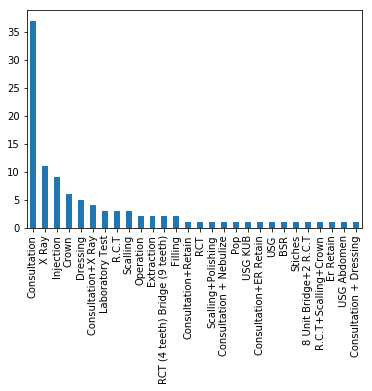

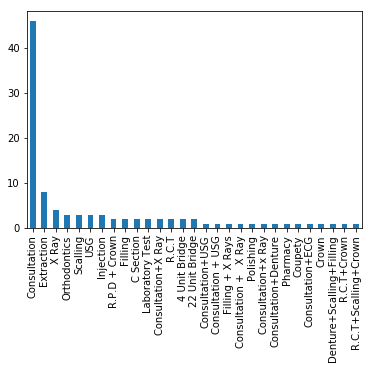

In [6]:
#Q5Which gender type had what kind of procedure in abundance?

Male=df[df['Sex']=='M'].Procedure.value_counts()
M=Male.plot(kind='bar')
plt.show() 
Female=df[(df['Sex']=='F') |(df['Sex']=='f')].Procedure.value_counts()
F=Female.plot(kind='bar')
plt.show()

Axes(0.125,0.125;0.775x0.755)


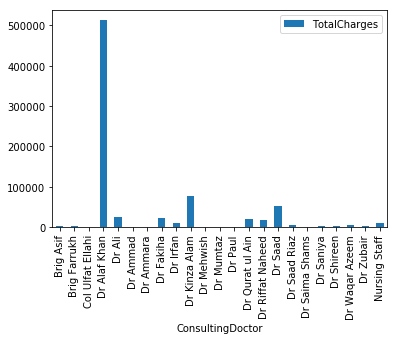

In [7]:
#Q6Which Doctor is earning highest?
df.TotalCharges=pd.to_numeric(df.TotalCharges,errors="coerce")
print(df.groupby(['ConsultingDoctor'])[["TotalCharges"]].sum().plot(kind='bar'))
plt.show()

In [9]:
#Q7Which procedure type earns more money?
df.TotalCharges=pd.to_numeric(df.TotalCharges,errors="coerce")
print(df.groupby(['Procedure'])[["TotalCharges"]].sum().idxmax().max())
#plt.show()

Orthodontics


In [10]:
#Q8Which time of the day has highest frequency of visits by hour?
df.Time=pd.to_datetime(df.Time,errors='coerce')
print("Highest Frequency in Hour:\n",df.Time.dt.hour.value_counts())

Highest Frequency in Hour:
 13.0    29
18.0    23
15.0    20
14.0    20
12.0    20
17.0    16
16.0    15
19.0    14
11.0    10
20.0     8
10.0     6
21.0     5
22.0     4
9.0      2
23.0     2
Name: Time, dtype: int64


In [11]:
#Q9 Create a bracket of time by Morning, Afternoon, Evening, Night 

import datetime
df.loc[(df.Time >= datetime.datetime.strptime('06:00AM','%I:%M%p'))& (df.Time <=datetime.datetime.strptime('12:00PM','%I:%M%p')),"TimeFrame"]="morning"
df.loc[(df.Time >= datetime.datetime.strptime('12:00PM', '%I:%M%p') ) & (df.Time <= datetime.datetime.strptime('04:00PM', '%I:%M%p')), 'TimeFrame'] = "afternoon"
df.loc[(df.Time >= datetime.datetime.strptime('7:00PM', '%I:%M%p') ) & (df.Time <= datetime.datetime.strptime('06:00AM', '%I:%M%p')), 'TimeFrame'] = "evening"


In [12]:
#Q10How many patients are repeated visitors?
maxv=0
for i in range(0,len(df.id)):
    if df.id.count() >1:
        maxv=df.id.value_counts()
print(maxv)

1      12
46      5
122     5
140     4
94      4
17      4
45      3
101     3
63      3
132     3
114     3
109     3
107     3
145     3
20      2
97      2
59      2
88      2
96      2
112     2
116     2
118     2
25      2
80      2
120     2
40      2
100     2
64      2
4       2
133     2
       ..
68      1
69      1
70      1
71      1
72      1
73      1
74      1
75      1
76      1
77      1
154     1
79      1
81      1
82      1
83      1
84      1
85      1
86      1
87      1
89      1
90      1
91      1
92      1
93      1
95      1
98      1
99      1
102     1
103     1
78      1
Name: id, dtype: int64


In [13]:
#Q11Give us the id of repeated visitors.
list1=[]
for i in range(0,len(df.id)):
    if df.id.count() >1:
        list1=df.id.value_counts()
print(list1.index)

Int64Index([  1,  46, 122, 140,  94,  17,  45, 101,  63, 132,
            ...
             90,  91,  92,  93,  95,  98,  99, 102, 103,  78],
           dtype='int64', length=155)


In [14]:
#Q12 Which patients visited again for the same problem? 
maxv=[]
maxv=df.groupby(['id','Procedure']).size()
maxv=maxv[maxv > 1]
print (maxv)

id   Procedure                     
1    Pharmacy                          10
12   22 Unit Bridge                     2
13   Consultation                       2
17   Consultation                       2
     RCT (4 teeth) Bridge (9 teeth)     2
20   Consultation                       2
25   Consultation                       2
45   R.P.D + Crown                      2
46   Dressing                           4
63   Consultation                       2
80   Consultation                       2
94   Injection                          3
97   Consultation                       2
101  C Section                          2
109  R.C.T                              2
112  Operation                          2
114  Consultation                       3
116  X Ray                              2
122  Injection                          5
130  Consultation                       2
140  4 Unit Bridge                      2
145  Crown                              3
151  R.C.T+Scalling+Crown               

In [15]:
#Q13What is the median age for Females and Males?

print(df.Age[df.Sex == 'M'].median())
print(df.Age[df.Sex == 'F'].median())

27.0
30.0


In [26]:
#Q14What is the total amount in balance?
count=0
df.replace(to_replace=df.AmountBalance.unique()[0],value=np.nan,inplace=True)
df.AmountBalance=df.AmountBalance.map(lambda x:str(x).replace(",",""))
df.AmountBalance=df.AmountBalance.map(lambda x:str(x).replace("-",""))
df.AmountBalance=df.AmountBalance.astype(float)
count=df.AmountBalance.sum()
print(count)

222500.0


In [22]:
#Q15How much money was made by Procedure Type “Consultation”?
#maxv=0
#for i in range(0,len(df['TotalCharges'])):
  #  if (df.Procedure[i]=='Consultation'):
            #maxv+= df.TotalCharges[i]
#print(maxv)
Total = df[df.Procedure == "Consultation"].TotalCharges
Total = list(Total)
for i in range(0, len(Total)):
    Total[i] = str(Total[i]).replace("nan", "0")
    Total[i] = str(Total[i]).replace("Cancelled", "0")
    Total[i] = float(Total[i])
sum(Total)

83950.0

In [23]:
#Q16Is there a relation between Age and Total Charges paid?
print(df.loc[:,["Age","TotalCharges"]].corr())

                   Age  TotalCharges
Age           1.000000      0.056932
TotalCharges  0.056932      1.000000


In [24]:
#Q17Which Age group had highest number of visits?
maxv=[]
df.Age=df.Age.replace("Nan","0")
maxv=df.Age.value_counts()
print(maxv)

0.0     30
30.0    20
40.0    11
26.0    11
17.0     9
28.0     8
50.0     7
45.0     7
3.0      7
29.0     6
39.0     6
23.0     6
60.0     5
27.0     5
13.0     4
76.0     4
32.0     4
6.0      4
25.0     3
19.0     3
9.0      3
2.0      3
10.0     3
21.0     3
53.0     3
38.0     3
20.0     3
55.0     3
48.0     2
35.0     2
54.0     2
57.0     2
24.0     2
22.0     2
34.0     2
52.0     2
78.0     2
42.0     2
43.0     1
36.0     1
14.0     1
18.0     1
75.0     1
65.0     1
64.0     1
80.0     1
70.0     1
8.0      1
7.0      1
5.0      1
31.0     1
49.0     1
47.0     1
58.0     1
33.0     1
56.0     1
Name: Age, dtype: int64


In [25]:
#Q18What is the total cost earned by Procedure Type X Ray and Scalling together?
scal_count=0
xray_count=0
total_count=0
df.TotalCharges=df.TotalCharges.astype(float)
df.TotalCharges=df.TotalCharges.fillna(0)
for i in range(0,len(df.TotalCharges)):
    if(df.Procedure[i]=="X Ray"):
        xray_count+= df.TotalCharges[i]
    elif(df.Procedure[i]=="Scalling"):
        scal_count+=df.TotalCharges[i]
total_count=scal_count+xray_count
print(total_count)

22300.0
